In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.ticker import MultipleLocator
import mpl_toolkits.axisartist.floating_axes as floating_axes

from mpl_toolkits.axisartist.grid_finder import MaxNLocator

In [22]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

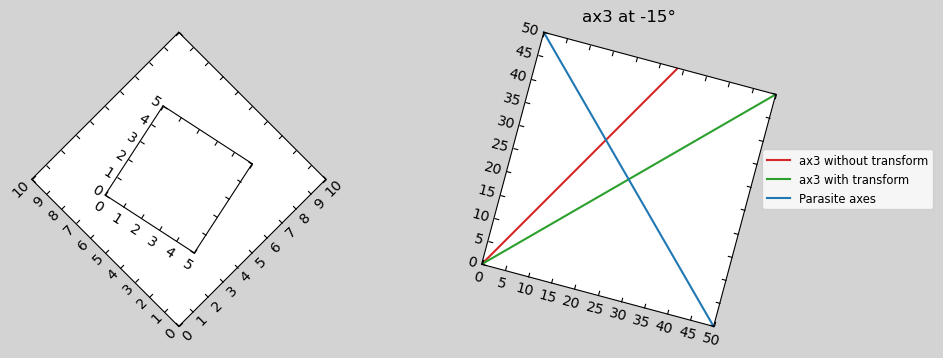

In [154]:
fig = plt.figure(figsize=(6, 6))

angle = 45
transform = Affine2D().scale(1, 1).rotate_deg(45)
grid_helper = floating_axes.GridHelperCurveLinear(transform,
                                                  (0, 10, 0, 10))

### Add floating axes with floating_axes 
ax1 = floating_axes.FloatingSubplot(fig,
                                    131,
                                    transform=fig.transFigure,
                                    grid_helper=grid_helper,
                                    )

ax1.set_position((0.5, 0, 0.5, 0.5))
fig.add_subplot(ax1)
fig.set_facecolor('lightgrey')



### Add a floating axes with inset_axes

transform2 = Affine2D().rotate_deg(-33)
grid_helper2 = floating_axes.GridHelperCurveLinear(transform2,
                                                  (0, 5, 0, 5),
                                                  grid_locator1=MaxNLocator(5),
                                                  grid_locator2=MaxNLocator(5),
                                                  )

ax2 = ax1.inset_axes( (0.25, 0.25, 0.5, 0.5),
                     #transform=ax1.transAxes,
                     axes_class=floating_axes.FloatingAxes,
                     grid_helper=grid_helper2,
                     )


### Add with fig.add_axes method


transform3 = Affine2D().rotate_deg(-15)
grid_helper3 = floating_axes.GridHelperCurveLinear(transform3,
                                                  (0, 50, 0, 50),
                                                  grid_locator1=MaxNLocator(10),
                                                  grid_locator2=MaxNLocator(10),
                                                  )
ax3 = fig.add_subplot(133,                                      
                      axes_class=floating_axes.FloatingAxes,
                      grid_helper=grid_helper3,
                      )

ax3.set_position((1.25, 0, 0.5, 0.5))
ax3.set_title('ax3 at -15°')

ax3.plot([0, 10, 20, 30, 40, 50],
         [0, 10, 20, 30, 40, 50],
         color='tab:red',
         label='ax3 without transform'
         )


ax3.plot([0, 10, 20, 30, 40, 50],
         [0, 10, 20, 30, 40, 50],
         color='tab:green',
         transform=transform3+ax3.transData,
         label='ax3 with transform'
         )


# get_aux_axes Despite this method's name, this should actually be thought of as an add_parasite_axes method.
ax3_aux = ax3.get_aux_axes(transform3)
ax3_aux.plot([50, 40, 30, 20, 10, 0],
             [0, 10, 20, 30, 40, 50],
             color='tab:blue',
             label='Parasite axes'
             )


ax3.legend(bbox_to_anchor=(1.23, 0.5), loc='center', fontsize='small')

#### Aesthetic changes

fig.set_facecolor('lightgrey')

ax3.set_aspect('equal')
#fig.tight_layout()
ax2.set_aspect('equal')
plt.show()

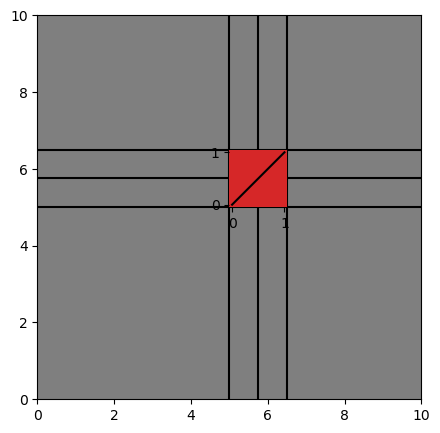

In [145]:
fig = plt.figure()
# Add axes at position [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


xpos,ypos = 5,5
size = 1.5
ax1 = ax.inset_axes([xpos,ypos,size,size], transform=ax.transData)

#ax1 = ax.inset_axes([0.5, 0.5, 0.15, 0.15], transform=ax.transAxes)
ax1.plot([0, 1], [0, 1],color='black')

#hide spines:
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


ax.set_facecolor('tab:gray')
ax1.set_facecolor('tab:red')

ax1.set_aspect('equal')

# Draw a line that surrounds the inset

ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')

ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')


ax.set_aspect('equal')
ax1.set_aspect('equal')
plt.show()

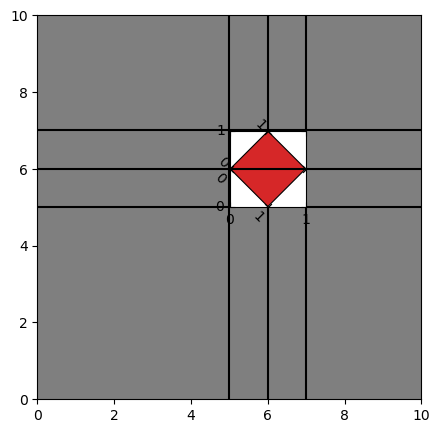

In [502]:
fig = plt.figure()

def grid_help(angle):

    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
        ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


gh, tr = grid_help(0)
ax1 = ax.inset_axes([xpos,ypos,2,2],
                     transform=ax.transData,
                     axes_class=floating_axes.FloatingAxes,
                     grid_helper=gh
                     )

xpos,ypos = 5,5
size = 2

gh, tr = grid_help(-45)
ax1 = ax.inset_axes([xpos,ypos,size,size],
                    transform=ax.transData,
                    axes_class=floating_axes.FloatingAxes,
                    grid_helper=gh
                    )
aux_ax = ax1.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1],color='black')

ax.set_facecolor('tab:gray')
ax1.set_facecolor('tab:red')

ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')

ax.set_aspect('equal')
ax1.set_aspect('equal')
plt.show()


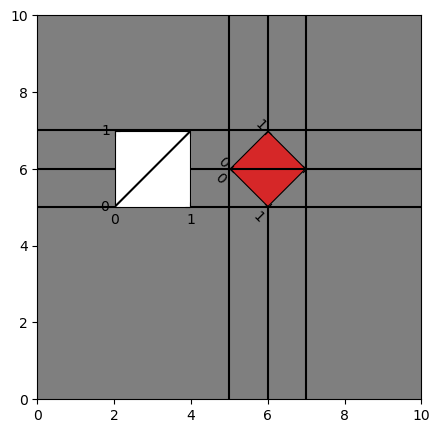

In [232]:
fig = plt.figure()

def grid_help(angle):

    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
        ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


gh, tr = grid_help(0)
ax1 = ax.inset_axes([2,ypos,2,2],
                     transform=ax.transData,
                     axes_class=floating_axes.FloatingAxes,
                     grid_helper=gh
                     )
ax1.plot([0, 1], [0, 1],color='black')

xpos,ypos = 5,5
size = 2

gh, tr = grid_help(-45)
ax1 = ax.inset_axes([xpos,ypos,size,size],
                    transform=ax.transData,
                    axes_class=floating_axes.FloatingAxes,
                    grid_helper=gh
                    )
aux_ax = ax1.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1],color='black')

ax.set_facecolor('tab:gray')
ax1.set_facecolor('tab:red')

ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')


ax.set_aspect('equal')
ax1.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()


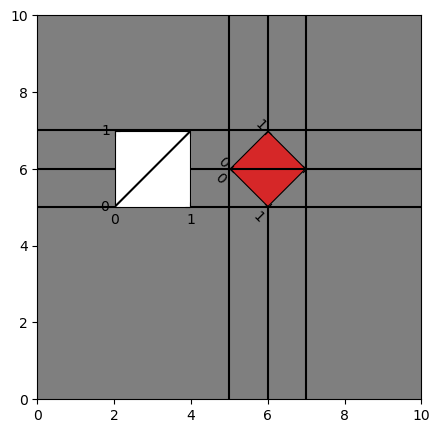

In [234]:
fig = plt.figure()

def grid_help(angle):

    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
        ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


gh, tr = grid_help(0)
ax1 = ax.inset_axes([2,ypos,2,2],
                     transform=ax.transData,
                     axes_class=floating_axes.FloatingAxes,
                     grid_helper=gh
                     )
ax1.plot([0, 1], [0, 1],color='black')

xpos,ypos = 5,5
size = 2

gh, tr = grid_help(-45)
ax1 = ax.inset_axes([xpos,ypos,size,size],
                    transform=ax.transData,
                    axes_class=floating_axes.FloatingAxes,
                    grid_helper=gh
                    )
aux_ax = ax1.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1],color='black')

ax.set_facecolor('tab:gray')
ax1.set_facecolor('tab:red')

ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')


ax.set_aspect('equal')
ax1.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()


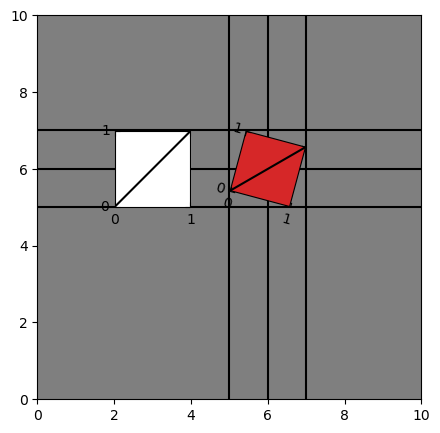

In [235]:
fig = plt.figure()

def grid_help(angle):

    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
        ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


gh, tr = grid_help(0)
ax1 = ax.inset_axes([2,ypos,2,2],
                     transform=ax.transData,
                     axes_class=floating_axes.FloatingAxes,
                     grid_helper=gh
                     )
ax1.plot([0, 1], [0, 1],color='black')

xpos,ypos = 5,5
size = 2

gh, tr = grid_help(-15)
ax1 = ax.inset_axes([xpos,ypos,size,size],
                    transform=ax.transData,
                    axes_class=floating_axes.FloatingAxes,
                    grid_helper=gh
                    )
aux_ax = ax1.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1],color='black')

ax.set_facecolor('tab:gray')
ax1.set_facecolor('tab:red')

ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos+size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos+size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')


ax.set_aspect('equal')
ax1.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()


### Scale the floating axes to the same size

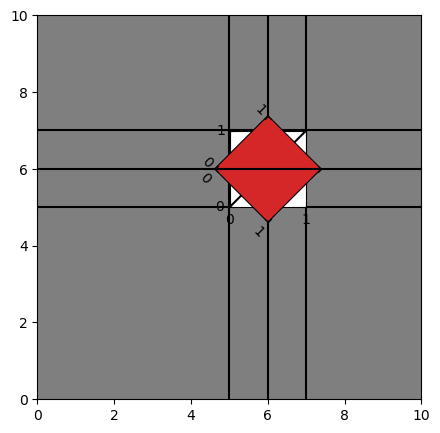

In [263]:
fig = plt.figure()
def grid_help(angle):
    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
    ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

xpos, ypos = 5, 5
original_size = 2

# First (non-rotated) axes
gh, tr = grid_help(0)
ax1 = ax.inset_axes(
    [xpos, ypos, original_size, original_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
ax1.plot([0, 1], [0, 1], color='black')

# Second (rotated) axes
angle = -45

rotated_size = original_size * np.sqrt(2)
offset = (rotated_size - original_size) / 2

gh, tr = grid_help(angle)
ax2 = ax.inset_axes(
    [xpos - offset, ypos - offset, rotated_size, rotated_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
aux_ax = ax2.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1], color='black')



# Styling
ax.set_facecolor('tab:gray')
ax2.set_facecolor('tab:red')

# Grid lines (using original_size for consistency)
ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')

# Set aspects
ax.set_aspect('equal')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()

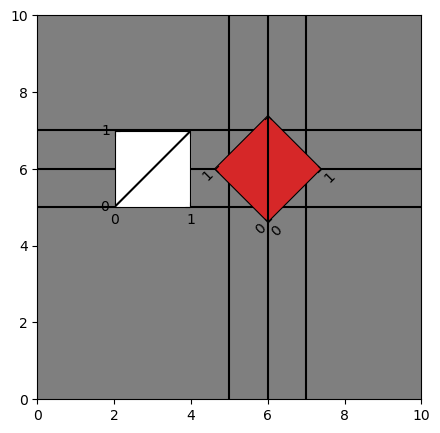

In [379]:
fig = plt.figure()
def grid_help(angle):
    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
    ), tr


ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

xpos, ypos = 5, 5
original_size = 2

# First (non-rotated) axes
gh, tr = grid_help(0)
ax1 = ax.inset_axes(
    [2, ypos, original_size, original_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
ax1.plot([0, 1], [0, 1], color='black')

# Second (rotated) axes
angle = -45
rotated_size = original_size * np.sqrt(2)
offset = (rotated_size - original_size) / 2

gh, tr = grid_help(angle)
ax2 = ax.inset_axes(
    [xpos - offset, ypos - offset, rotated_size, rotated_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
aux_ax = ax2.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1], color='black')



# Styling
ax.set_facecolor('tab:gray')
ax2.set_facecolor('tab:red')

# Grid lines (using original_size for consistency)
ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')

# Set aspects
ax.set_aspect('equal')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()

Only works for 45 degree rotations. 

For other rotations we must consider the angle between the axes and the distance between the axes.

The $\sqrt{2}$ scaling is specifically optimized for 45-degree rotations. For other angles, the scaling factor would be different. Let me explain the general formula:
For any angle $\theta$, the scaling factor would be:


$$\text{scaling factor} = max(|cos(\theta)|, |sin(\theta)|)$$



In [239]:
def get_scale_factor(angle_degrees):
    theta = np.radians(angle_degrees)
    return abs(np.cos(theta)) + abs(np.sin(theta))

In [256]:
print(f"get_scale_factor(45)={get_scale_factor(45):.3f} is very close to √2={np.sqrt(2):.3f}")


get_scale_factor(45)=1.414 is very close to √2=1.414


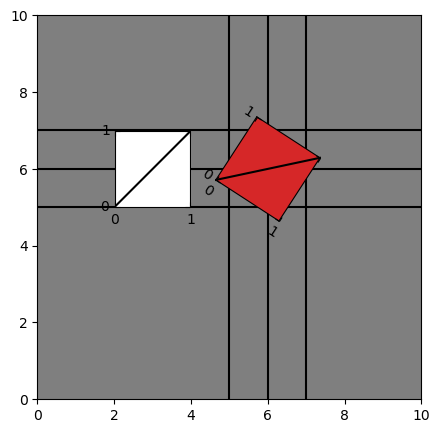

In [348]:
fig = plt.figure()

def grid_help(angle):
    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
    ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

xpos, ypos = 5, 5
original_size = 2

# First (non-rotated) axes
gh, tr = grid_help(0)
ax1 = ax.inset_axes(
    [2, ypos, original_size, original_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
ax1.plot([0, 1], [0, 1], color='black')

# Second (rotated) axes
angle = -33
rotated_size = original_size * get_scale_factor(angle)
offset = (rotated_size - original_size) / 2

gh, tr = grid_help(angle)
ax2 = ax.inset_axes(
    [xpos - offset, ypos - offset, rotated_size, rotated_size],
    transform=ax.transData,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=gh
)
aux_ax = ax2.get_aux_axes(tr)
aux_ax.plot([0, 1], [0, 1], color='black')
    

# Styling
ax.set_facecolor('tab:gray')
ax2.set_facecolor('tab:red')

# Grid lines (using original_size for consistency)
ax.vlines(xpos, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size/2, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.vlines(xpos + original_size, ax.get_xlim()[0], ax.get_xlim()[1], color='black')
ax.hlines(ypos, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size/2, ax.get_ylim()[0], ax.get_ylim()[1], color='black')
ax.hlines(ypos + original_size, ax.get_ylim()[0], ax.get_ylim()[1], color='black')

# Set aspects
ax.set_aspect('equal')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
aux_ax.set_aspect('equal')

plt.show()

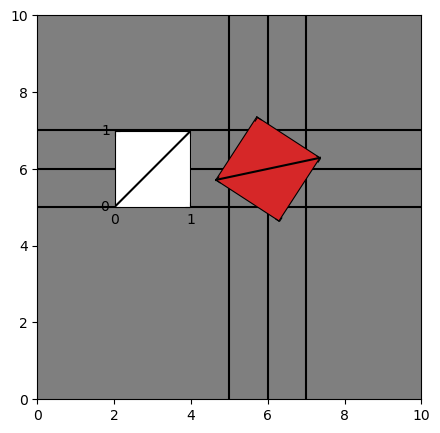

In [358]:
ax2.axis["left"].major_ticklabels.set_visible(False)
ax2.axis["bottom"].major_ticklabels.set_visible(False)
ax2.figure

(0.95, 2.0)

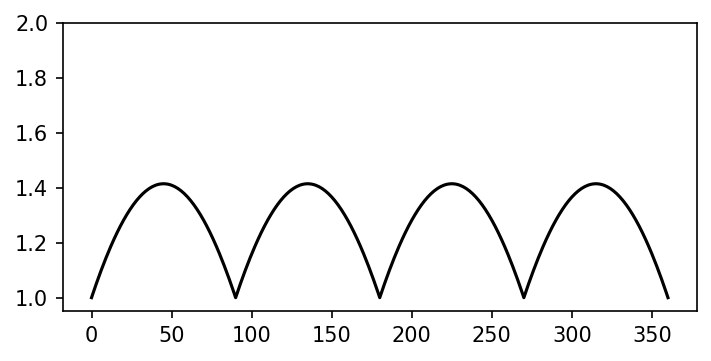

In [288]:
plt.figure(figsize=(12,2.5),dpi=150)
ax = plt.subplot(1,2,1)

step = 1
ax.plot( range(0,360+step,step), 
         [get_scale_factor(i) for i in range(0,360+step,step)],
         color='black'
         )

ax.set_ylim(0.95,2)


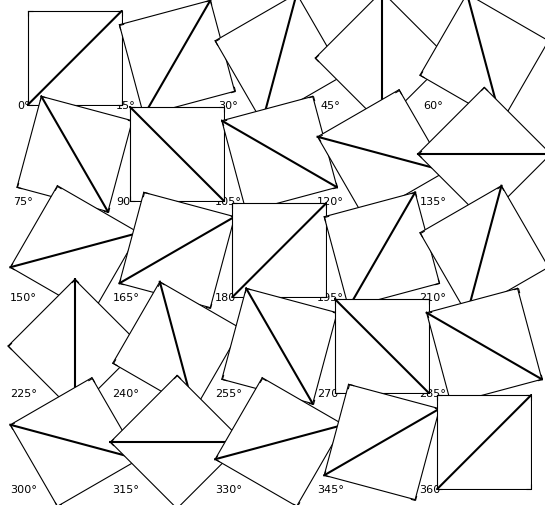

In [402]:
fig = plt.figure()

def grid_help(angle):
    tr = Affine2D().rotate_deg(angle)
    return floating_axes.GridHelperCurveLinear(
        tr,
        extremes=(0,1,0,1),
        grid_locator1=MaxNLocator(1),
        grid_locator2=MaxNLocator(1)
    ), tr

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 25)
ax.set_ylim(0, 20)

original_size = 5

angles = range(0, 360+15, 15)

# Define starting positions
start_x, start_y = 0, 15
step_x, step_y = 5, 5  # Adjust step sizes based on your layout

# Calculate the number of insets per row
insets_per_row = int((ax.get_xlim()[1] - start_x) / step_x)

for idx, angle in enumerate(angles):
    # Calculate row and column indices
    row = idx // insets_per_row
    col = idx % insets_per_row
    
    # Calculate positions
    xpos = start_x + col * step_x
    ypos = start_y - row * step_y  # Decrement ypos to move down
    
    rotated_size = original_size * get_scale_factor(angle)
    offset = (rotated_size - original_size) / 2
    
    gh, tr = grid_help(angle)
    ax2 = ax.inset_axes(
        [xpos - offset, ypos - offset, rotated_size, rotated_size],
        transform=ax.transData,
        axes_class=floating_axes.FloatingAxes,
        grid_helper=gh,
        clip_on=False
    )
    
    # Remove tick labels from the inset axes
    ax2.axis["left"].major_ticklabels.set_visible(False)
    ax2.axis["bottom"].major_ticklabels.set_visible(False)
    

    plt.text(xpos, ypos, f"{angle}°", ha='center', va='center', fontsize=8)
    # Plot on the inset axes
    aux_ax = ax2.get_aux_axes(tr)
    aux_ax.plot([0, 1], [0, 1], color='black',clip_on=True)



# remove ax spines
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


plt.show()

------

<FloatingAxesHostAxes: >

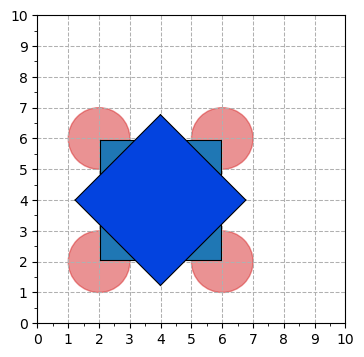

In [500]:
fig = plt.figure(figsize=(4, 4))

# Main axis
ax1 = plt.subplot(1, 1, 1, aspect=1, xlim=[0, 10], ylim=[0, 10])
ax1.xaxis.set_major_locator(MultipleLocator(1.00))
ax1.xaxis.set_minor_locator(MultipleLocator(0.50))
ax1.yaxis.set_major_locator(MultipleLocator(1.00))
ax1.yaxis.set_minor_locator(MultipleLocator(0.50))
ax1.grid(linewidth=0.75, linestyle="--")


### Mark the corners of the inset axes with rotation 0
ax1.add_artist(plt.Circle((2, 2), 1, color='tab:red', alpha=0.5,transform=ax1.transData))
ax1.add_artist(plt.Circle((6, 6), 1, color='tab:red', alpha=0.5,transform=ax1.transData))
ax1.add_artist(plt.Circle((6, 2), 1, color='tab:red', alpha=0.5,transform=ax1.transData))
ax1.add_artist(plt.Circle((2, 6), 1, color='tab:red', alpha=0.5,transform=ax1.transData))



angle = 0
transform = Affine2D().scale(1, 1).rotate_deg(angle)
helper = floating_axes.GridHelperCurveLinear(transform,
                                             (0, 1, 0, 1))

# This doesn't need the parasitic axes
ax0 = floating_axes.FloatingSubplot(fig,
                                    111,
                                    transform=ax1.transData,
                                    grid_helper=helper,
                                    zorder=0)



#### Add ax to the figure obejct using ax1.transData but transformed into figure normalized coordinates
data_start = np.array([2, 2])  # Starting point (x, y) in data coordinates
data_size = np.array([4, 4])   # Width and height in data units

start_display = ax1.transData.transform(data_start) # Transform data coordinates to display coordinates
end_display = ax1.transData.transform(data_start + data_size) # Transform data coordinates to display coordinates

# Invert the figure transform to get figure normalized coordinates
start_fig = fig.transFigure.inverted().transform(start_display) # Transform display coordinates to figure normalized coordinates
end_fig = fig.transFigure.inverted().transform(end_display) # Transform display coordinates to figure normalized coordinates

# Calculate the left, bottom, width, and height in figure coordinates
left = start_fig[0]
bottom = start_fig[1]
width = end_fig[0] - start_fig[0]
height = end_fig[1] - start_fig[1]

# Set the position of ax2 using figure normalized coordinates
ax0.set_position([left, bottom, width, height]) # Set the position of ax2 using figure normalized coordinates from data coordinates
ax0.set_facecolor('tab:blue')

########

angle = 45
transform = Affine2D().scale(1, 1).rotate_deg(angle)
helper = floating_axes.GridHelperCurveLinear(transform,
                                             (0, 1, 0, 1))

# This doesn't need the parasitic axes
ax2 = floating_axes.FloatingSubplot(fig,
                                    111,
                                    transform=ax1.transData,
                                    grid_helper=helper,
                                    zorder=1)


# Define the original center point and size
center_point = np.array([4, 4])  # Center point in data coordinates
original_size = 4  # Size in data units
scaled_size = original_size * np.sqrt(2)  # Scale for 45-degree rotation

# Calculate the new starting point that maintains the same center
offset = (scaled_size - original_size) / 2
data_start = center_point - np.array([scaled_size/2, scaled_size/2])  # Adjust starting point to maintain center
data_size = np.array([scaled_size, scaled_size])

# Transform to display coordinates
start_display = ax1.transData.transform(data_start)
end_display = ax1.transData.transform(data_start + data_size)

# Transform to figure coordinates
start_fig = fig.transFigure.inverted().transform(start_display)
end_fig = fig.transFigure.inverted().transform(end_display)

# Calculate position
left = start_fig[0]
bottom = start_fig[1]
width = end_fig[0] - start_fig[0]
height = end_fig[1] - start_fig[1]

ax2.set_position([left, bottom, width, height])
ax2.set_facecolor('xkcd:blue')

########################################################

# Remove ax2 ticks
ax2.axis["bottom"].major_ticklabels.set_visible(False)
ax2.axis["left"].major_ticklabels.set_visible(False)

ax0.axis["bottom"].major_ticklabels.set_visible(False)
ax0.axis["left"].major_ticklabels.set_visible(False)

for axis in ["top", "right", "bottom", "left"]:
    ax2.axis[axis].major_ticks.set_visible(False)
    ax0.axis[axis].major_ticks.set_visible(False)


fig.add_subplot(ax2)
fig.add_subplot(ax0)

-----

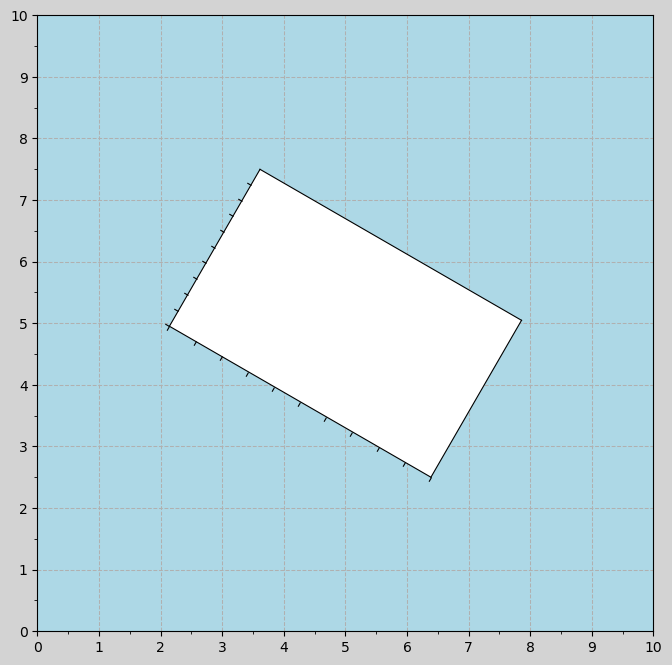

In [405]:



fig = plt.figure(figsize=(8, 8))

# Main axis
ax1 = plt.subplot(1, 1, 1, aspect=1, xlim=[0, 10], ylim=[0, 10])
ax1.xaxis.set_major_locator(MultipleLocator(1.00))
ax1.xaxis.set_minor_locator(MultipleLocator(0.50))
ax1.yaxis.set_major_locator(MultipleLocator(1.00))
ax1.yaxis.set_minor_locator(MultipleLocator(0.50))
ax1.grid(linewidth=0.75, linestyle="--")

# Floating axis
center = np.array([5, 5])  # data coordinates
size = np.array([5, 3])  # data coordinates
orientation = -30  # degrees
T = size / 2 * [(-1, -1), (+1, -1), (+1, +1), (-1, +1), (-1, -1)]
rotation = Affine2D().rotate_deg(orientation)
P = center + rotation.transform(T)

# Floating axis bounding box visualization
# T = rotation.transform(T)
# xmin, xmax = T[:,0].min(), T[:,0].max()
# ymin, ymax = T[:,1].min(), T[:,1].max()
# T = [(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)]
# P = center + T
# plt.plot(P[:,0], P[:,1], color="black", linewidth=0.75)

# Actual floating axis
DC_to_FC = ax1.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
xmin, ymin = DC_to_NFC((P[:, 0].min(), P[:, 1].min()))
xmax, ymax = DC_to_NFC((P[:, 0].max(), P[:, 1].max()))
transform = Affine2D().scale(1, 1).rotate_deg(orientation)


helper = floating_axes.GridHelperCurveLinear(transform, (0, size[0], 0, size[1]))
ax2 = floating_axes.FloatingSubplot(fig,
                                    111,
                                    grid_helper=helper,
                                    zorder=0)
ax2.set_position((xmin, ymin, xmax - xmin, ymax - ymin))
fig.add_subplot(ax2)


# Cosmetic changes
ax2.axis["bottom"].major_ticks.set_tick_out(True)
ax2.axis["bottom"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticks.set_visible(False)
ax2.axis["left"].major_ticks.set_tick_out(True)
ax2.axis["left"].major_ticklabels.set_visible(False)
ax2.axis["right"].major_ticks.set_visible(False)

#aux = ax2.get_aux_axes(transform)
# aux.text(
#     0.1,
#     0.1,
#     "Floating & rotated axis",
#     ha="left",
#     va="bottom",
#     size=10,
#     rotation=orientation,
#     rotation_mode="anchor",
# )

# aux.set_xticks([0, 1])

fig.set_facecolor('lightgrey')
ax1.set_facecolor('lightblue')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator,
                                                 MaxNLocator)

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4),
        grid_locator1=MaxNLocator(nbins=4),
        grid_locator2=MaxNLocator(nbins=4))

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    aux_ax = ax1.get_aux_axes(tr)

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    # create a parasite Axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    # Specify theta limits in degrees
    ra0, ra1 = 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")
    ax1.grid()

    # create a parasite Axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax

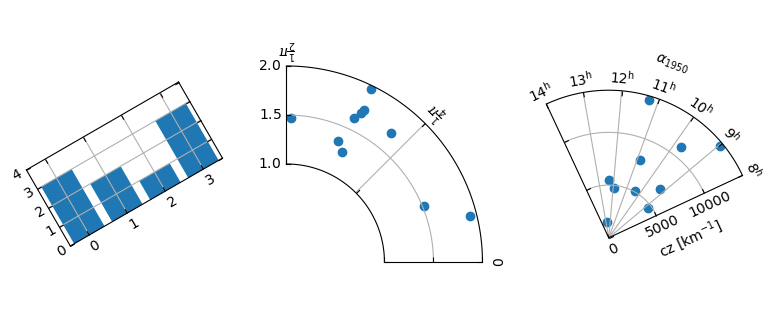

In [4]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()